In [50]:
## LIBRARIES

## Librerias 
import pandas as pd
from numpy import mean
import pickle
import numpy as np 
import bentoml
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import *
import sklearn as skl
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from numpy import std
from sklearn.preprocessing import scale 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import model_selection
from scipy import stats
from scipy.stats import boxcox 
import pylab as pl
from sklearn import linear_model
import pyreadr 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
import xgboost as xgb

In [34]:
## Import dataset

df = pd.read_csv("/Users/alexandervalverde/Library/Mobile Documents/com~apple~CloudDocs/ML_Zoom_Camp/Capstone1/whisky.csv", index_col=False)
df

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960


In [35]:
## See if there nulls

nulls = df.isnull().sum(axis = 0)
nulls

def dropid(data):
    return data.drop(columns=['RowID','Latitude','Longitude','Postcode','Distillery'])

df = dropid(df)

df

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


In [36]:
## Statistics

df.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000


In [37]:
## Check 
for var in df: 
    
    print(df[var].value_counts())


2    45
1    19
3    11
4     9
0     2
Name: Body, dtype: int64
2    44
3    29
1    10
4     3
Name: Sweetness, dtype: int64
1    45
2    28
3     5
4     4
0     4
Name: Smoky, dtype: int64
0    59
1    15
2     7
4     3
3     2
Name: Medicinal, dtype: int64
0    76
1    10
Name: Tobacco, dtype: int64
1    33
2    32
0    18
3     2
4     1
Name: Honey, dtype: int64
2    37
1    33
0    12
3     4
Name: Spicy, dtype: int64
1    37
0    29
2    15
3     3
4     2
Name: Winey, dtype: int64
2    43
1    27
0    12
3     3
4     1
Name: Nutty, dtype: int64
2    55
1    21
3     8
0     2
Name: Malty, dtype: int64
2    49
1    18
3    13
0     6
Name: Fruity, dtype: int64
2    49
1    19
0     9
3     7
4     2
Name: Floral, dtype: int64


In [38]:
## Correlacion 
matrix = df.corr()
matrix.style.background_gradient(cmap='coolwarm')

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


In [39]:
# Check frequency

for var in df: 
    
    print(df[var].value_counts()/np.float(len(df)))

2    0.523256
1    0.220930
3    0.127907
4    0.104651
0    0.023256
Name: Body, dtype: float64
2    0.511628
3    0.337209
1    0.116279
4    0.034884
Name: Sweetness, dtype: float64
1    0.523256
2    0.325581
3    0.058140
4    0.046512
0    0.046512
Name: Smoky, dtype: float64
0    0.686047
1    0.174419
2    0.081395
4    0.034884
3    0.023256
Name: Medicinal, dtype: float64
0    0.883721
1    0.116279
Name: Tobacco, dtype: float64
1    0.383721
2    0.372093
0    0.209302
3    0.023256
4    0.011628
Name: Honey, dtype: float64
2    0.430233
1    0.383721
0    0.139535
3    0.046512
Name: Spicy, dtype: float64
1    0.430233
0    0.337209
2    0.174419
3    0.034884
4    0.023256
Name: Winey, dtype: float64
2    0.500000
1    0.313953
0    0.139535
3    0.034884
4    0.011628
Name: Nutty, dtype: float64
2    0.639535
1    0.244186
3    0.093023
0    0.023256
Name: Malty, dtype: float64
2    0.569767
1    0.209302
3    0.151163
0    0.069767
Name: Fruity, dtype: float64
2    0.569

/var/folders/zw/mb45ddnn0g98d2p147gt67bm0000gn/T/ipykernel_31367/4224830601.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
/var/folders/zw/mb45ddnn0g98d2p147gt67bm0000gn/T/ipykernel_31367/4224830601.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.floa

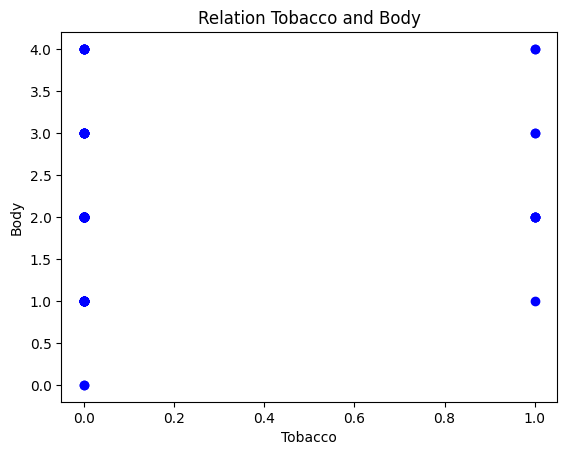

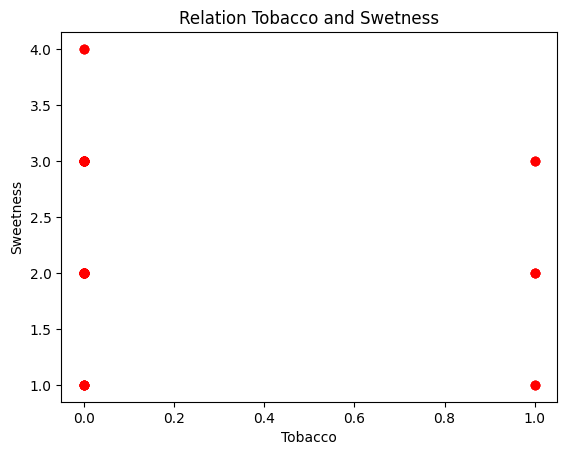

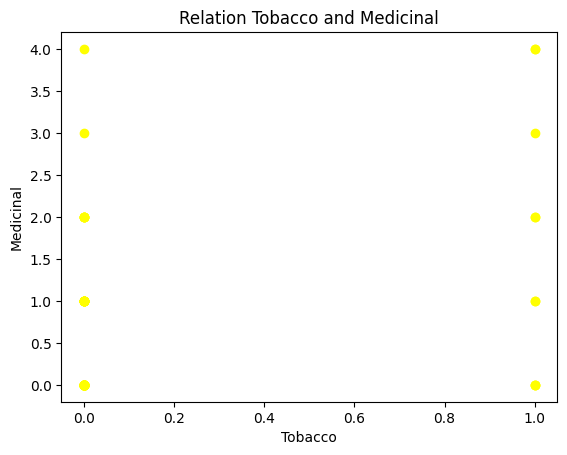

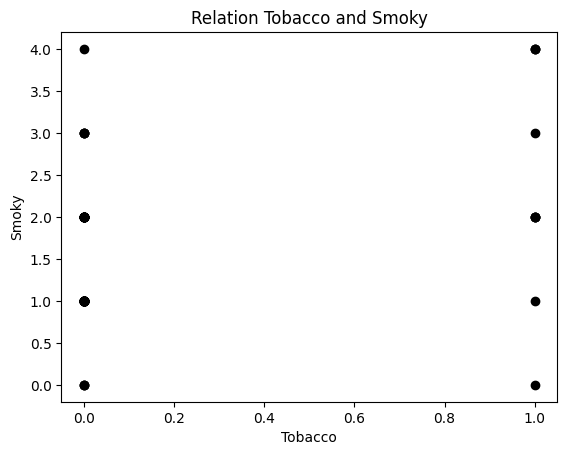

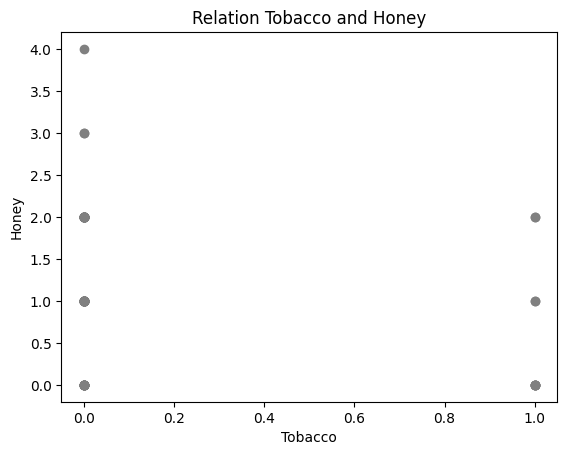

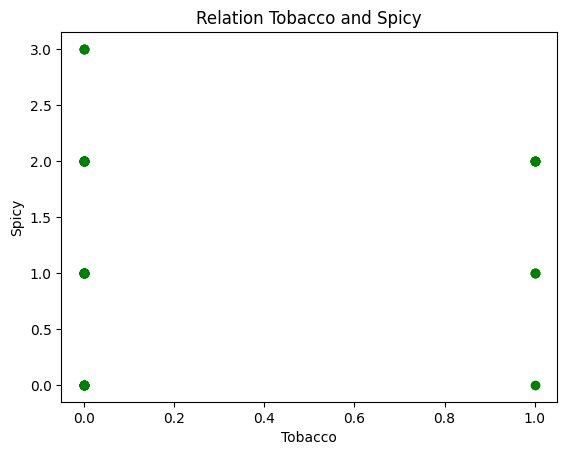

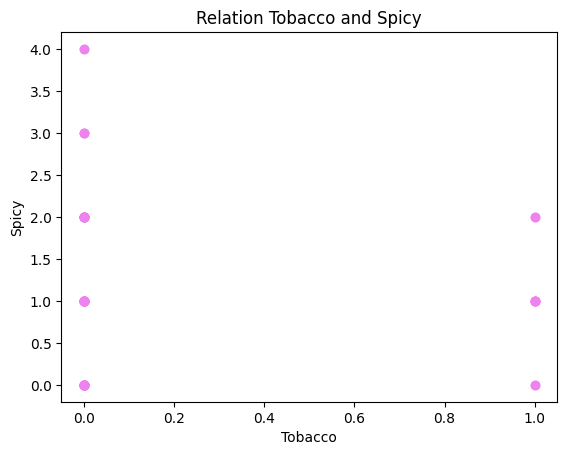

In [8]:
## Plots against the Y variable (Tobacco)
Body = df['Body']
Tobacco = df['Tobacco']
Sweetness = df['Sweetness']
Smoky = df['Smoky']
Medicinal = df['Medicinal']
Honey = df['Honey']
Spicy = df['Spicy']
Winey = df['Winey']

#1.correlation between Tobacco and Body
plt.scatter(Tobacco, Body, c ="blue")
plt.xlabel("Tobacco")
plt.ylabel("Body")
plt.title("Relation Tobacco and Body")
# To show the plot
plt.show()


#2.correlation between Tobacco and Sweetness
plt.scatter(Tobacco, Sweetness, c ="red")
plt.xlabel("Tobacco")
plt.ylabel("Sweetness")
plt.title("Relation Tobacco and Swetness")
# To show the plot
plt.show()

#3.correlation between Tobacco and Sweetness
plt.scatter(Tobacco, Medicinal, c ="yellow")
plt.xlabel("Tobacco")
plt.ylabel("Medicinal")
plt.title("Relation Tobacco and Medicinal")
# To show the plot
plt.show()

#4.correlation between Tobacco and Smoky
plt.scatter(Tobacco, Smoky, c ="black")
plt.xlabel("Tobacco")
plt.ylabel("Smoky")
plt.title("Relation Tobacco and Smoky")
# To show the plot
plt.show()

#5.correlation between Tobacco and Honey
plt.scatter(Tobacco, Honey, c ="grey")
plt.xlabel("Tobacco")
plt.ylabel("Honey")
plt.title("Relation Tobacco and Honey")
# To show the plot
plt.show()

#6.correlation between Tobacco and Spicy
plt.scatter(Tobacco, Spicy, c ="green")
plt.xlabel("Tobacco")
plt.ylabel("Spicy")
plt.title("Relation Tobacco and Spicy")
# To show the plot
plt.show()

#7.correlation between Tobacco and Winey
plt.scatter(Tobacco, Winey, c ="violet")
plt.xlabel("Tobacco")
plt.ylabel("Spicy")
plt.title("Relation Tobacco and Spicy")
# To show the plot
plt.show()

In [40]:
## Create a dataframe with the predictor variables

categorical = ['Body', 'Sweetness', 'Smoky', 'Medicinal','Honey', 'Spicy',
       'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']


In [41]:
## Split data set 

df_train, df_test =train_test_split(df, test_size=0.30,random_state=123)

## Extracr Y variable
y_train = (df_train.Tobacco).values
y_test = (df_test.Tobacco).values

del df_train['Tobacco']
del df_test['Tobacco']

In [42]:
## To dictionary
dict_train = df_train.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [43]:
## Vectorize

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)



In [44]:
## Naive Bayes

# Definir el modelo
gnb = GaussianNB()


# Fit el modelo
gnb.fit(X_train, y_train)

## ACCURACY

## Train data set
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


## Test data set
y_pred = gnb.predict(X_test)
print('Test Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Predictions
print(y_pred[0:10])

## ROC

roc = roc_auc_score(y_test, y_pred)
print("The Roc on Naive Bayes is:", roc)

Training-set accuracy score: 0.8500
Test Model accuracy score: 0.9615
[0 0 0 0 0 0 0 0 0 0]
The Roc on Naive Bayes is: 0.5


In [45]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

## Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

## ACCURACY

## Train data set
y_pred_train = dt.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


## Test data set
y_pred = dt.predict(X_test)
print('Test Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Validation
roc = roc_auc_score(y_test, y_pred)
print("The Roc on Decision Tree is:", roc)




Training-set accuracy score: 1.0000
Test Model accuracy score: 0.9231
The Roc on Decision Tree is: 0.48


In [48]:
## XGboost Model 

## Divide data
      
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

## XGboost Parameters

xgb_params = {
    'eta': 0.8,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

## Model
model_xgb = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

## Extract important feautures 
scores = model_xgb.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

# Weight
scores = model_xgb.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

## Predictions
predictions = model_xgb.predict(dtest)
predictions



[0]	train-auc:0.84967	test-auc:0.40000
[10]	train-auc:0.97821	test-auc:0.40000
[20]	train-auc:0.98693	test-auc:0.52000
[30]	train-auc:0.99564	test-auc:0.52000
[40]	train-auc:0.99782	test-auc:0.56000
[50]	train-auc:0.99782	test-auc:0.60000
[60]	train-auc:0.99782	test-auc:0.60000
[70]	train-auc:1.00000	test-auc:0.64000
[80]	train-auc:1.00000	test-auc:0.64000
[90]	train-auc:1.00000	test-auc:0.64000
[99]	train-auc:1.00000	test-auc:0.64000


array([1.4990417e-03, 1.6666290e-03, 5.6724893e-03, 2.4099804e-01,
       2.9377840e-04, 8.2952948e-04, 2.9384108e-02, 5.6422562e-03,
       1.5355101e-03, 8.2171243e-03, 8.5474215e-03, 1.9911814e-01,
       1.1615315e-04, 9.5296979e-02, 7.6690828e-04, 1.4833764e-04,
       1.3844544e-03, 8.7219757e-01, 1.4784776e-04, 5.1111963e-02,
       1.5385596e-04, 8.5723348e-04, 3.7035659e-01, 1.6063975e-01,
       1.5760422e-02, 1.8138707e-02], dtype=float32)

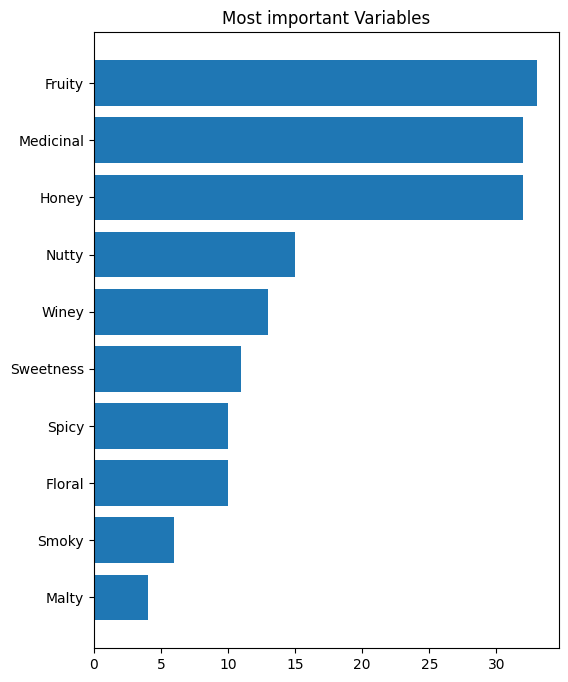

In [47]:
## Plot Xgboost variables 

names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

## Plot most important variables in Xgboost
pl.figure( figsize =(6,8) )

pl.barh(np.arange(len(scores)), scores)
pl.yticks(np.arange(len(names)), names)
pl.title("Most important Variables")
pl.show()

In [19]:
## Save model

with open('/Users/alexandervalverde/Library/Mobile Documents/com~apple~CloudDocs/ML_Zoom_Camp/Capstone1/model_gnb.bin','wb') as f_out:
 pickle.dump((dv,gnb), f_out)

In [20]:
## Save model with BentoML

bentoml.sklearn.save_model("Whisky_pred", gnb, 
                           custom_objects={
                               "DictVectorizer": dv
                           })

Converting 'Whisky_pred' to lowercase: 'whisky_pred'.


Model(tag="whisky_pred:pstllpdzrgwk7pve", path="/Users/alexandervalverde/bentoml/models/whisky_pred/pstllpdzrgwk7pve/")